# TP0

## Integrantes
- Arian
- Ariel
- Juan Felipe
- Juan Luis Barberia

In [38]:
# Add ".."" to path to find the src module
import os
import sys
sys.path.append("..")

# import packages
from itertools import product
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Constantes
POKEMONES = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
POKEBOLAS = ["pokeball", "ultraball", "fastball", "heavyball"]

pokemon_factory = PokemonFactory("../pokemon.json")

## 1.A.

Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?




Probabilidad de Captura promedio por pokebola
---------------------------------------------
pokebola  pokeball  ultraball  fastball  heavyball
pokemon                                           
caterpie      0.36       0.70      0.32       0.37
jolteon       0.07       0.12      0.18       0.01
mewtwo        0.00       0.02      0.00       0.00
onix          0.06       0.15      0.06       0.12
snorlax       0.04       0.08      0.01       0.12


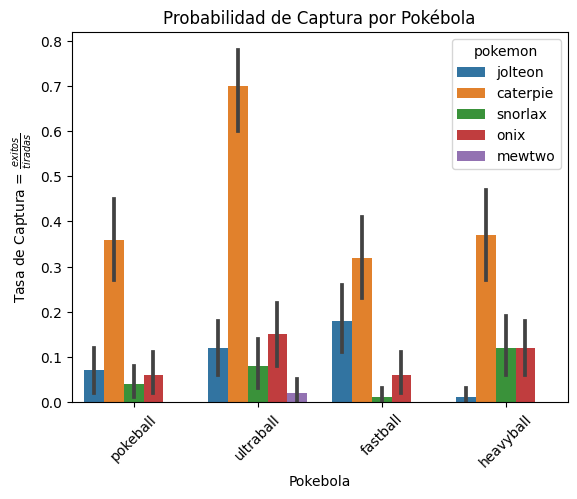

In [159]:
hp = 1.0
lvl = 1.0

results = []
for pokemon_name, pokebola in product(POKEMONES, POKEBOLAS):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.1)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
        })

df_results = pd.DataFrame(results)
results_per_pokemon = df_results.pivot_table(index="pokemon", columns="pokebola",
                                              values="attempt_success", aggfunc="mean")
print("Probabilidad de Captura promedio por pokebola")
print("---------------------------------------------")
print(results_per_pokemon[POKEBOLAS])

sns.barplot(x="pokebola", y="attempt_success", hue="pokemon",
            data=df_results, errorbar="ci")

plt.xlabel("Pokebola")
plt.ylabel("Tasa de Captura = $\\frac{exitos}{tiradas}$")
plt.title("Probabilidad de Captura por Pokébola")
plt.xticks(rotation=45)
plt.show()

## 1.B.

¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justiﬁcar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

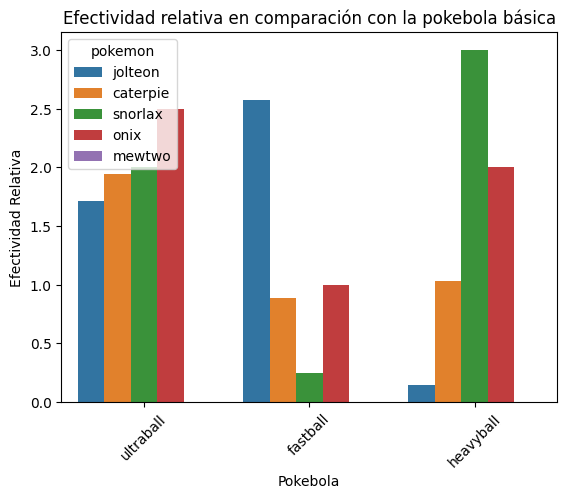

In [161]:
df_results["relative_success"] = df_results["attempt_success"] / [results_per_pokemon["pokeball"][row.pokemon] for i, row in df_results.iterrows()]
sns.barplot(x="pokebola", y="relative_success", hue="pokemon",
            data=df_results[df_results.pokebola != "pokeball"], errorbar=None)

plt.xlabel("Pokebola")
plt.ylabel("Efectividad Relativa")
plt.title("Efectividad relativa en comparación con la pokebola básica")
plt.xticks(rotation=45)
plt.show()

La **efectividad relativa** de una pokebola \( B \) en comparación con la **pokebola básica** se define como:

$Efectividad Relativa (B) = \frac{\text{Success Rate} (B)}{\text{Success Rate} (\text{Pokeball})}$

**Ejemplo de cálculo para Caterpie con Ultraball**
- Success Rate con Pokeball = 0.29
- Success Rate con Ultraball = 0.68

Aplicamos la ecuación:

$Efectividad Relativa (Ultraball) = \frac{0.68}{0.29} = 2.34$

**Ejemplo de cálculo para Caterpie con Fastball**
- Success Rate con Pokeball = 0.29
- Success Rate con Fastball = 0.36

$Efectividad Relativa(Fastball) = \frac{0.36}{0.29} = 1.24$

Estos cálculos demuestran cómo la efectividad varía en función del tipo de pokebola.

- Fastball es altamente efectiva en Jolteon. Jolteon es un Pokémon rápido, lo que coincide con la mecánica de la Fastball, que tiene mayor éxito en Pokémon veloces.

- Heavyball es más efectiva en Onix. Onix es un Pokémon muy pesado, y la Heavyball tiene bonificaciones según el peso, lo que explica esta mejora.

- Ultraball es consistentemente más efectiva que la Pokeball para todos los Pokémon. En promedio, duplica la tasa de éxito, lo cual es esperado ya que tiene una bonificación general.

- Heavyball es inefectiva en Jolteon. Esto se debe a que Jolteon es un Pokémon liviano y la Heavyball no le da ninguna bonificación. 

- Mewtwo es extremadamente difícil de atrapar con cualquier pokebola.


## 2.A.

¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cual es más o menos efectiva?

## 2.B.

¿Cómo afectan los puntos de vida a la efectividad de la captura?

Sugerencia: Elegir uno o dos Pokémon y, manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos % de HP.

## 2.C.

¿Qué parámetros son los que más afectan la probabilidad de captura?

## 2.D.

Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

## 2.E.

A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?